In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
df=pd.read_csv(r"Weather-related disease prediction.csv")
df.head(5)

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


In [ ]:
#Data Info
df.describe()
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14  headache                

Index(['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache', 'prognosis'],
      dtype='object')

In [ ]:
df.isna().sum()
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
print("First 5 rows:\n", df.head())
print("\nShape (rows, columns):", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nSummary Statistics:\n", df.describe())
print("\nUnique values in 'prognosis':", df['prognosis'].nunique())

First 5 rows:
    Age  Gender  Temperature (C)  Humidity  Wind Speed (km/h)  nausea  \
0    4       1           25.826  0.740000           8.289000       1   
1   55       0           21.628  0.600000          15.236000       0   
2   45       0           13.800  0.817083           4.291992       0   
3    6       0           37.254  0.610000          18.009000       1   
4   70       0           18.162  0.870000          17.916000       0   

   joint_pain  abdominal_pain  high_fever  chills  ...  facial_pain  \
0           0               0           0       0  ...            0   
1           0               0           0       1  ...            0   
2           0               0           0       0  ...            0   
3           0               0           1       0  ...            0   
4           0               0           0       0  ...            1   

   shortness_of_breath  reduced_smell_and_taste  skin_irritation  itchiness  \
0                    1                        

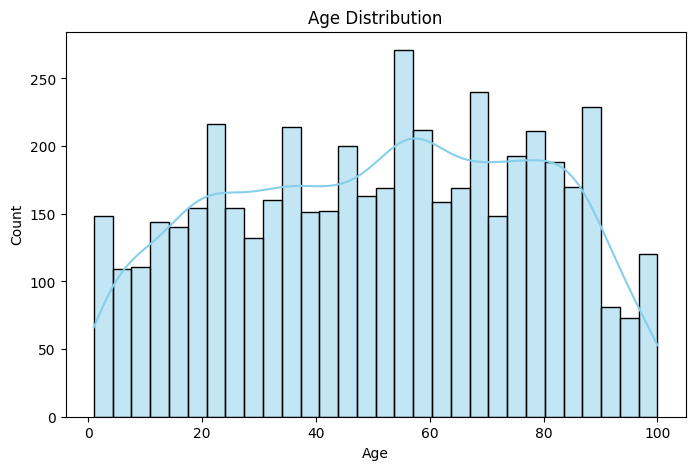

In [ ]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-10-2070399524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


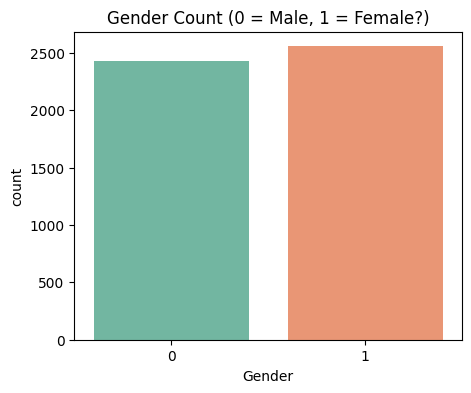

In [ ]:
# Gender Count
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Count (0 = Male, 1 = Female?)')
plt.show()

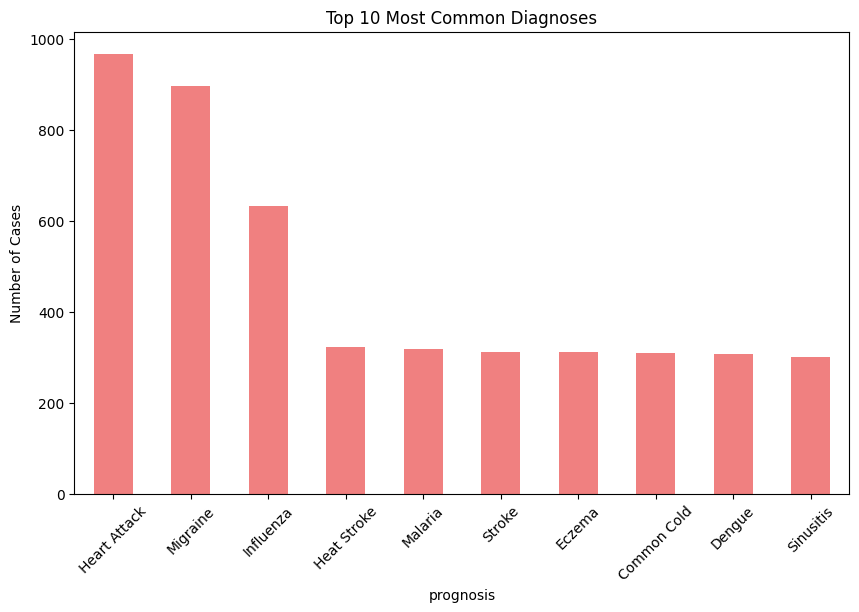

In [ ]:
# Top 10 Most Common Diseases
plt.figure(figsize=(10,6))
df['prognosis'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Common Diagnoses')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Features and Target
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# Encode Target
le = LabelEncoder()
y = le.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Build the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Predict and Evaluate
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9899699097291875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.93      0.96      0.95        56
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        63
           4       0.99      1.00      0.99       188
           5       0.97      0.97      0.97        61
           6       0.98      0.97      0.98       128
           7       1.00      1.00      1.00        57
           8       1.00      1.00      1.00       191
           9       1.00      1.00      1.00        62
          10       1.00      0.97      0.98        66

    accuracy                           0.99       997
   macro avg       0.99      0.99      0.99       997
weighted avg       0.99      0.99      0.99       997


Confusion Matrix:
 [[ 71   0   0   0   0   0   0   0   0   0   0]
 [  0  54   0   0   0   0   2   0   0   0   0]
 [  0   0  54   0 